<a href="https://colab.research.google.com/github/aldonat/IdCamp/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: BIKE SHARING DATASET
- **Nama:** Aldona Septiana
- **Email:** aldonaseptiana19@gmail.com
- **ID Dicoding:** aldonast

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah sewa sepeda harian pada beberapa bulan terakhir?
- Apakah terdapat perbedaan signifikan dalam jumlah sewa sepeda antara hari kerja dan hari libur
- Bagaimana kondisi sewa sepeda berdasarkan musim

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gathering Data

In [3]:
#Membaca Dataset
day_df = pd.read_csv('/content/drive/MyDrive/DICODING/DATASET/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/DICODING/DATASET/hour.csv')

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Menilai Tabel day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#Missing Value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi :", day_df.duplicated().sum())

Jumlah duplikasi : 0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Menilai Tabel hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("jumlah duplikasi : ",hour_df.duplicated().sum())

jumlah duplikasi :  0


In [13]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

####Cleaning data day_df

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
#Merubah Tipe Data
day_df['dteday'] = pd.to_datetime(day_df['dteday'].str.strip())

category_columns =['season','yr','weekday','workingday','weathersit']

for column in category_columns:
  day_df[column]= day_df[column].astype('category')

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

In [18]:
#Merubah numerik menjadi kategorik di kolom season pada data day_df
day_df['season']=day_df['season'].map({
    1 : 'springer',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
})

#Merubah numerik menjadi kategorik di kolom yr pada data day_df
day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

#Merubah numerik menjadi kategorik di kolom weekday pada data day_df
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})


#Merubah numerik menjadi kategorik di kolom workingday pada data day_df
day_df['workingday']=day_df['workingday'].map({
    0 : 'Holiday',
    1 : 'Workingday'
})


#Merubah numerik menjadi kategorik di kolom weathersit pada data day_df
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [19]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


####Cleaning data hour_df

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
# Ubah tipe data ke categorical hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'].str.strip())

category_columns1= ['season','yr','weekday','workingday','weathersit']

for column in category_columns1:
  hour_df[column]=hour_df[column].astype('category')

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [23]:
#Merubah numerik menjadi kategorik di kolom season pada data hour_df
hour_df['season']=hour_df['season'].map({
    1 : 'springer',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
})

#Merubah numerik menjadi kategorik di kolom yr pada data hour_df
hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})


#Merubah numerik menjadi kategorik di kolom weekday pada data hour_df
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})


#Merubah numerik menjadi kategorik di kolom workingday pada data hour_df
hour_df['workingday']=hour_df['workingday'].map({
    0 : 'Holiday',
    1 : 'Workingday'
})


#Merubah numerik menjadi kategorik di kolom weathersit pada data hour_df
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [24]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data Day_df

In [25]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
560,561,2012-07-14,fall,2012,7,0,Sat,Holiday,Misty/Cloudy,0.703333,0.666042,0.699167,0.143679,2355,4614,6969
634,635,2012-09-26,winter,2012,9,0,Wed,Workingday,Clear/Partly Cloudy,0.635000,0.596613,0.630833,0.244400,787,6946,7733
699,700,2012-11-30,winter,2012,11,0,Fri,Workingday,Clear/Partly Cloudy,0.298333,0.323867,0.649583,0.058471,362,5306,5668
610,611,2012-09-02,fall,2012,9,0,Sun,Holiday,Misty/Cloudy,0.696667,0.649000,0.815000,0.064071,2613,3197,5810
620,621,2012-09-12,fall,2012,9,0,Wed,Workingday,Clear/Partly Cloudy,0.599167,0.570075,0.577083,0.131846,1050,6820,7870


In [26]:
day_df.instant.is_unique

True

In [27]:
day_df.groupby(by='workingday').agg({
    "instant":"nunique",
    "cnt":["max","min","mean","std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
Holiday        231  8714  605  4330.168831  2052.141245
Workingday     500  8362   22  4584.820000  1878.415583

In [28]:
day_df.groupby(by='season').instant.nunique().sort_values(ascending=False)

,instant
season,
fall,188
summer,184
springer,181
winter,178


In [29]:
day_df.groupby(by='weathersit').instant.nunique().sort_values(ascending=False)

,instant
weathersit,
Clear/Partly Cloudy,463
Misty/Cloudy,247
Light Snow/Rain,21


### Explore Data Hour_df

In [30]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10839,10840,2012-04-01,summer,2012,4,18,0,Sun,Holiday,Clear/Partly Cloudy,0.52,0.5000,0.52,0.2985,153,279,432
3329,3330,2011-05-23,summer,2011,5,15,0,Mon,Workingday,Misty/Cloudy,0.72,0.6818,0.62,0.4478,57,119,176
3850,3851,2011-06-14,summer,2011,6,8,0,Tue,Workingday,Clear/Partly Cloudy,0.58,0.5455,0.49,0.3881,45,441,486
14844,14845,2012-09-15,fall,2012,9,17,0,Sat,Holiday,Misty/Cloudy,0.66,0.6212,0.36,0.2537,295,434,729
4921,4922,2011-07-28,fall,2011,7,23,0,Thu,Workingday,Clear/Partly Cloudy,0.76,0.7424,0.75,0.1940,28,95,123


In [31]:
hour_df.groupby(by='workingday').agg({
    "instant":"nunique",
    "cnt":["max","min","mean","std"]
})

instant  cnt                            
           nunique  max min        mean         std
workingday                                         
Holiday       5514  783   1  181.405332  172.853832
Workingday   11865  977   1  193.207754  185.107477

In [32]:
hour_df.groupby(by='season').instant.nunique().sort_values(ascending=False)

,instant
season,
fall,4496
summer,4409
springer,4242
winter,4232


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi jumlah sewa sepeda harian pada beberapa bulan terakhir?

In [33]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
532,533,2012-06-16,summer,2012,6,0,Sat,Holiday,Clear/Partly Cloudy,0.631667,0.594708,0.504167,0.166667,2963,4739,7702
494,495,2012-05-09,summer,2012,5,0,Wed,Workingday,Misty/Cloudy,0.575000,0.553025,0.744167,0.216412,620,4097,4717
531,532,2012-06-15,summer,2012,6,0,Fri,Workingday,Clear/Partly Cloudy,0.639167,0.599754,0.589583,0.176617,1563,6102,7665
91,92,2011-04-02,summer,2011,4,0,Sat,Holiday,Misty/Cloudy,0.315000,0.315637,0.653750,0.197146,898,1354,2252
601,602,2012-08-24,fall,2012,8,0,Fri,Workingday,Misty/Cloudy,0.702500,0.647100,0.615000,0.072146,1325,6257,7582


In [34]:
monthly_rent_df = day_df.resample('M', on='dteday').agg({
    "cnt": "sum"  # Menjumlahkan total rental_count per bulan
})

monthly_rent_df.index= monthly_rent_df.index.strftime('%B')
monthly_rent_df = monthly_rent_df.reset_index()
monthly_rent_df.rename(columns={
    "cnt": "rent_count",
}, inplace=True)
monthly_rent_df.head()


,dteday,rent_count
0,January,38189
1,February,48215
2,March,64045
3,April,94870
4,May,135821


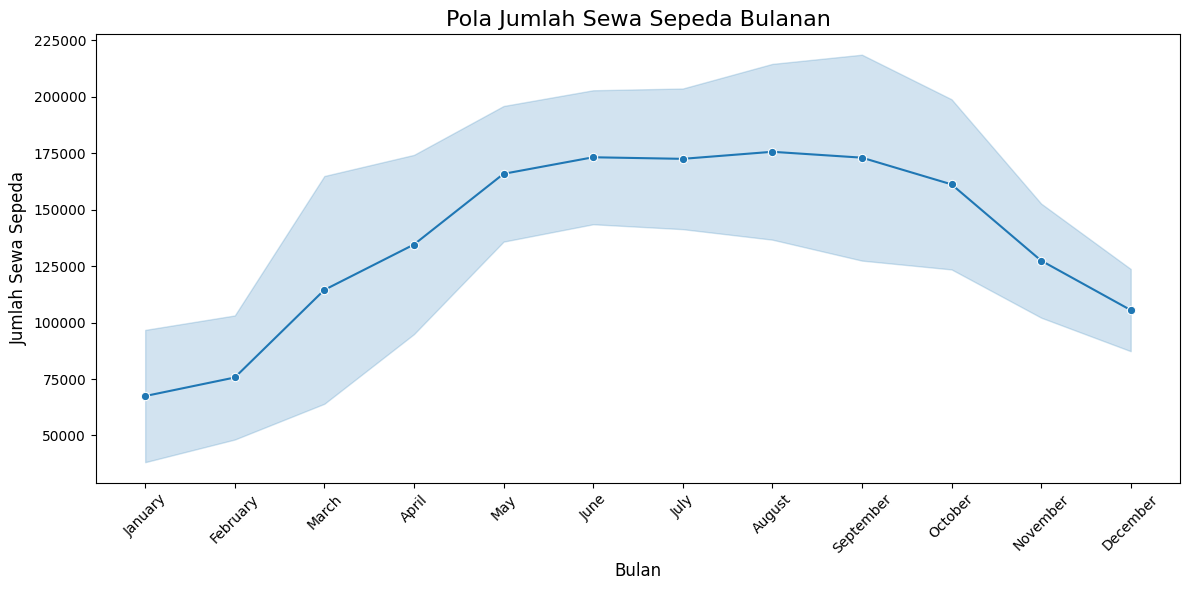

In [35]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    x='dteday',
    y='rent_count',
    data=monthly_rent_df,
    marker="o")

plt.title("Pola Jumlah Sewa Sepeda Bulanan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Sewa Sepeda", fontsize=12)

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 2: Apakah terdapat perbedaan signifikan dalam jumlah sewa sepeda antara hari kerja dan hari libur

In [36]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
497,498,2012-05-12,summer,2012,5,0,Sat,Holiday,Clear/Partly Cloudy,0.564167,0.544817,0.480417,0.123133,2622,4807,7429
7,8,2011-01-08,springer,2011,1,0,Sat,Holiday,Misty/Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
135,136,2011-05-16,summer,2011,5,0,Mon,Workingday,Clear/Partly Cloudy,0.577500,0.550512,0.787917,0.126871,773,3185,3958
585,586,2012-08-08,fall,2012,8,0,Wed,Workingday,Misty/Cloudy,0.750000,0.707717,0.672917,0.110700,1263,6271,7534
60,61,2011-03-02,springer,2011,3,0,Wed,Workingday,Clear/Partly Cloudy,0.335000,0.320071,0.449583,0.307833,231,1903,2134


In [37]:
working_day = day_df.groupby(by='workingday').agg({
    'cnt': 'sum'
}).reset_index()

working_day.rename(columns={
    "cnt": "jumlah_sewa"
}, inplace=True)
working_day


,workingday,jumlah_sewa
0,Holiday,1000269
1,Workingday,2292410


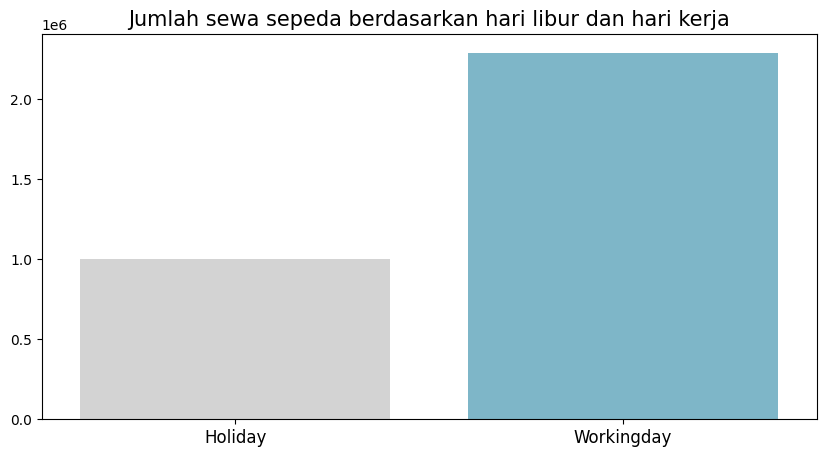

In [38]:

plt.figure(figsize=(10, 5))
colors_ = [ "#D3D3D3", "#72BCD4"]
sns.barplot(
    y="jumlah_sewa",
    x="workingday",
    data=working_day.sort_values(by="jumlah_sewa", ascending=False), # Use the correct DataFrame name: working_day
    palette=colors_
)

plt.title("Jumlah sewa sepeda berdasarkan hari libur dan hari kerja", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3:Bagaimana kondisi sewa sepeda berdasarkan musim

In [39]:
seasonal_rent_df = day_df.groupby('season').agg({
    'cnt': 'sum'
}).reset_index()
seasonal_rent_df.rename(columns={
    'season': 'Musim',
    'cnt': 'Jumlah Sewa'},
    inplace=True)
seasonal_rent_df

,Musim,Jumlah Sewa
0,springer,471348
1,summer,918589
2,fall,1061129
3,winter,841613


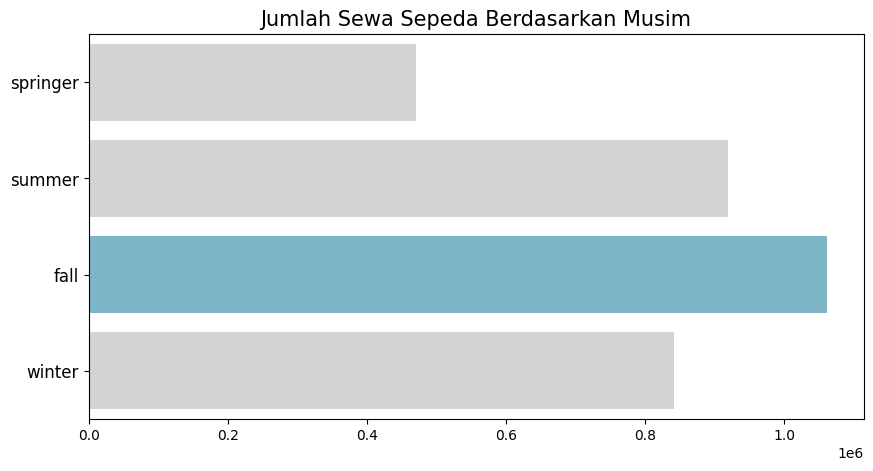

In [40]:
colors_ = []
max_value = seasonal_rent_df['Jumlah Sewa'].max()  # Mengambil nilai maksimum

for index, row in seasonal_rent_df.iterrows():
    if row['Jumlah Sewa'] == max_value:
        colors_.append("#72BCD4")
    else:
        colors_.append("#D3D3D3")

# Membuat grafik bar
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Jumlah Sewa",
    y="Musim",
    data=seasonal_rent_df,
    palette=colors_
)

plt.title("Jumlah Sewa Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

# Menampilkan grafik
plt.show()

## Conclusion

- Bagaimana distribusi jumlah sewa sepeda harian pada beberapa bulan terakhir?
  Jumlah sewa sepeda meningkat secara signifikan selama bulan Mei hingga mencapai puncaknya pada bulan Juni, Juli, Agustus, September.

- Apakah terdapat perbedaan signifikan dalam jumlah sewa sepeda antara hari kerja dan hari libur
 Pengguna sepeda antara hari libur dan hari kerja memiliki perbedaan yang signifikan dimana jumlah penyewa sepeda paling banyak pada hari kerja (workingday).

- Bagaimana kondisi sewa sepeda berdasarkan musim?
 Kondisi sewa sepeda berdasarkan musim dimulai dari musim semi (springer) yang menunjukan penyewaan paling sedikit, kemudian meningkat pada musim panas ( summer) dan musim gugur (fall) sebagai musim dengan penyewaan terbanyak, kemudian mengalami penurunan di musim dingin (winter)